## Accelerometer Dataset Classification using K-Nearest Neighbors (Euclidean)

쿨링팬 고장을 측정하기 위해 팬 속도와 가속도 센서를 측정하여 모터 고장 시간을 인식하기 위한 데이터셋

엔진에서 진동 분석이 필요한 예측, 분류 및 기타 작업에 사용 가능하며, 쿨링팬에서 생성된 진동을 사용

모터 고장 환경을 구성하기 위해 쿨링팬에 무게 추를 이용하여 3가지 경우(정상, 수직 배치, 반대 배치)에 대해 데이터셋을 구성함

쿨러에는 진동 데이터를 수집하기 위해 가속도계가 부착되었고, 이 데이터를 사용하여 모터 고장 시간을 예측

1,530,000개의 데이터셋과 4개의 특징(Fan RPM, acc_x, acc_y, acc_z)으로 구성되어져 있음

In [3]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

(153000, 4)


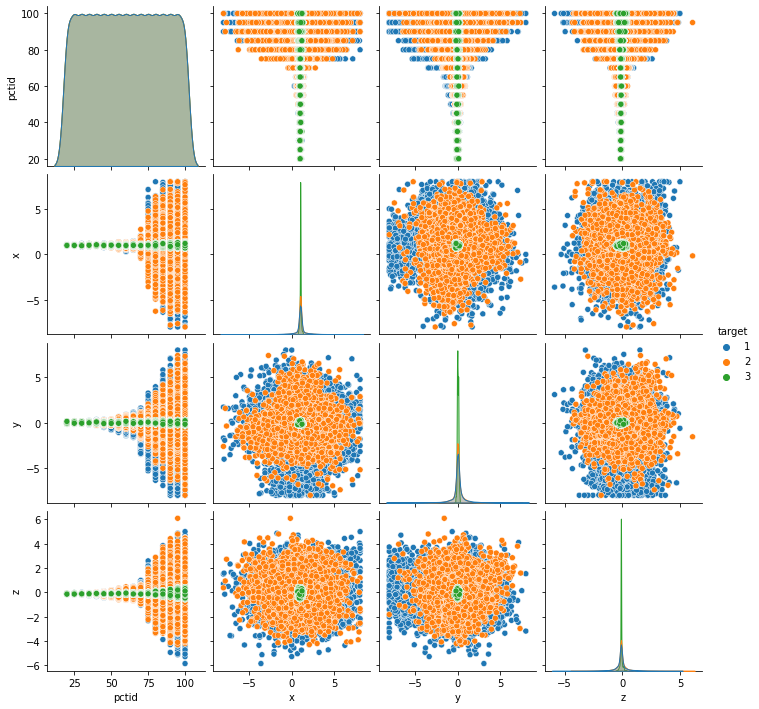

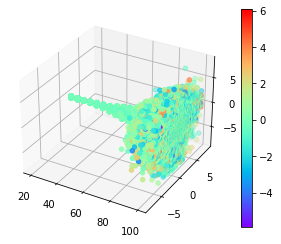

In [4]:
df = pd.read_csv("../accelerometer.csv")

features = df[["pctid", "x", "y", "z"]].values
target = df["wconfid"].values

print(features.shape)

feature_names = ["pctid", "x", "y", "z"]

df_feature = pd.DataFrame(features, columns=feature_names)
df_target = pd.DataFrame(target, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[:, 0]
y = features[:, 1]
z = features[:, 2]
c = features[:, 3]

img = ax.scatter(x, y, z, c=c, cmap=plt.cm.rainbow)
fig.colorbar(img)
plt.show()

## K-Nearest Neighbor (Accelerometer)

In [5]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

start = time.perf_counter()

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train size :  122400  / test size :  30600



C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\sklearn\neighbors\_base.py:600: RuntimeWarning: invalid value encountered in sqrt
  return tree.query(*args, **kwargs)
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\sklearn\neighbors\_base.py:600: RuntimeWarning: invalid value encountered in sqrt
  return tree.query(*args, **kwargs)


Training set score: 0.335596
Test set score: 0.329837
Training Time : 6.1509 sec
